In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std),np.array(Y_list)


## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()
method_name = 'EI'


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.55555556]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.6607746012924816
2 -th sampling, result =  4.185388957498203
3 -th sampling, result =  4.027145452565387
4 -th sampling, result =  3.7007908543022814
5 -th sampling, result =  3.7049105043592045
evaluated mean of added datum: [3.85580207]
evaluated std of added datum: 0.21110117303500653
---------------------------------------

1-th iteration 
 new added datum: [8.6, array([3.8558])]


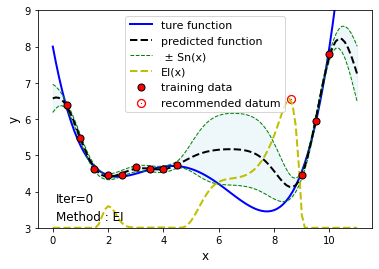

current optimal is : 3.8558
The next datum recomended by Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  4.155905780885065
2 -th sampling, result =  3.6569745139766003
3 -th sampling, result =  3.392725075732119
4 -th sampling, result =  3.978577888768094
5 -th sampling, result =  3.0907573587410053
evaluated mean of added datum: [3.65498812]
evaluated std of added datum: 0.3854273066451168
---------------------------------------

2-th iteration 
 new added datum: [8.1, array([3.655])]


<Figure size 432x288 with 0 Axes>

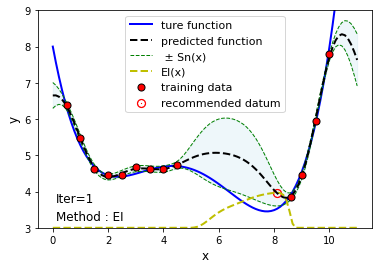

current optimal is : 3.655
The next datum recomended by Expected Improvement : 
 x =  [7.]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.55256067247051
2 -th sampling, result =  3.520164866868275
3 -th sampling, result =  3.7443401538835888
4 -th sampling, result =  3.837080653151074
5 -th sampling, result =  3.7076948632885496
evaluated mean of added datum: [3.67236824]
evaluated std of added datum: 0.1192290449320939
---------------------------------------

3-th iteration 
 new added datum: [7.0, array([3.6724])]


<Figure size 432x288 with 0 Axes>

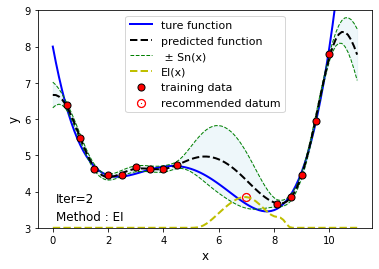

current optimal is : 3.655
The next datum recomended by Expected Improvement : 
 x =  [7.44444444]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.4451059427723494
2 -th sampling, result =  3.4242964281423593
3 -th sampling, result =  3.6505496206535955
4 -th sampling, result =  2.907995083158169
5 -th sampling, result =  3.5652489358161086
evaluated mean of added datum: [3.3986392]
evaluated std of added datum: 0.2587534598933533
---------------------------------------

4-th iteration 
 new added datum: [7.4, array([3.3986])]


<Figure size 432x288 with 0 Axes>

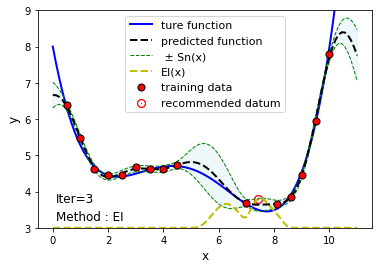

current optimal is : 3.3986
The next datum recomended by Expected Improvement : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.9198380092343528
2 -th sampling, result =  2.858929601359681
3 -th sampling, result =  3.2719996599714154
4 -th sampling, result =  3.264654720037775
5 -th sampling, result =  3.6488307936176065
evaluated mean of added datum: [3.39285056]
evaluated std of added datum: 0.3631397403618036
---------------------------------------

5-th iteration 
 new added datum: [7.6, array([3.3929])]


<Figure size 432x288 with 0 Axes>

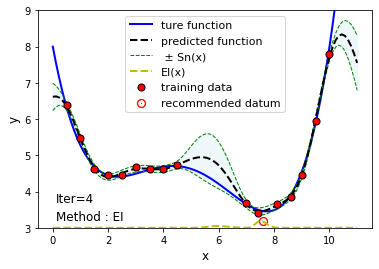

<Figure size 432x288 with 0 Axes>

In [7]:
obs = 5
guessed_noise_std = 0.1

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.55555556]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.9884597032978353
2 -th sampling, result =  4.17589786808001
3 -th sampling, result =  3.6071364723427157
4 -th sampling, result =  4.003447518618718
5 -th sampling, result =  4.126322746544108
evaluated mean of added datum: [3.98025286]
evaluated std of added datum: 0.19971708196617063
---------------------------------------

1-th iteration 
 new added datum: [8.6, array([3.9803])]


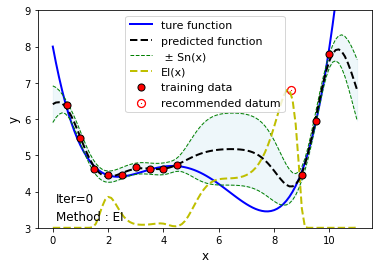

current optimal is : 3.9803
The next datum recomended by Expected Improvement : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  4.017062659725575
2 -th sampling, result =  4.282751638571294
3 -th sampling, result =  2.4813959366895086
4 -th sampling, result =  4.383411706547774
5 -th sampling, result =  3.2967658565771143
evaluated mean of added datum: [3.69227756]
evaluated std of added datum: 0.7147692243246366
---------------------------------------

2-th iteration 
 new added datum: [8.2, array([3.6923])]


<Figure size 432x288 with 0 Axes>

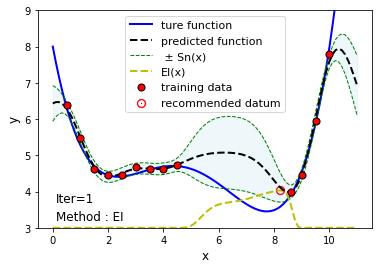

current optimal is : 3.6923
The next datum recomended by Expected Improvement : 
 x =  [7.22222222]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  4.048082075184556
2 -th sampling, result =  3.7524188769104425
3 -th sampling, result =  3.453800795905421
4 -th sampling, result =  3.3383753776969773
5 -th sampling, result =  3.6794402215148834
evaluated mean of added datum: [3.65442347]
evaluated std of added datum: 0.24711612212763076
---------------------------------------

3-th iteration 
 new added datum: [7.2, array([3.6544])]


<Figure size 432x288 with 0 Axes>

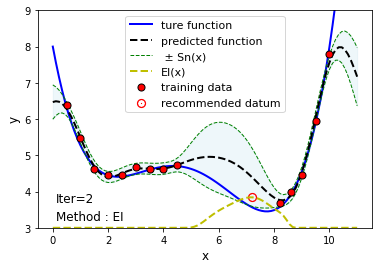

current optimal is : 3.6544
The next datum recomended by Expected Improvement : 
 x =  [6.44444444]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  4.123444196812643
2 -th sampling, result =  3.7763579775608127
3 -th sampling, result =  4.43281431151488
4 -th sampling, result =  4.226952883891548
5 -th sampling, result =  4.300210164362321
evaluated mean of added datum: [4.17195591]
evaluated std of added datum: 0.22197839399666497
---------------------------------------

4-th iteration 
 new added datum: [6.4, array([4.172])]


<Figure size 432x288 with 0 Axes>

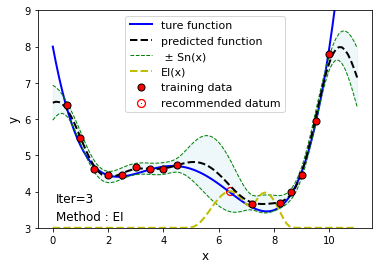

current optimal is : 3.6544
The next datum recomended by Expected Improvement : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.1442940415411305
2 -th sampling, result =  3.2333129473908584
3 -th sampling, result =  3.560123185378144
4 -th sampling, result =  3.4076377582733257
5 -th sampling, result =  3.6754487401988687
evaluated mean of added datum: [3.40416333]
evaluated std of added datum: 0.19730850070383465
---------------------------------------

5-th iteration 
 new added datum: [7.7, array([3.4042])]


<Figure size 432x288 with 0 Axes>

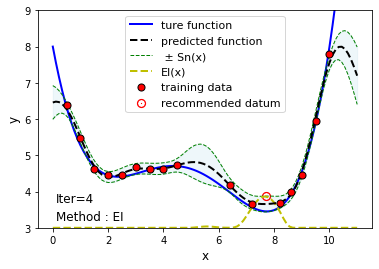

<Figure size 432x288 with 0 Axes>

In [10]:
obs = 5
guessed_noise_std = 0.2

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.720789405235813
2 -th sampling, result =  3.8581023941119503
3 -th sampling, result =  3.7950022895534348
4 -th sampling, result =  3.5806126005656282
5 -th sampling, result =  3.3392783883670405
evaluated mean of added datum: [3.65875702]
evaluated std of added datum: 0.18456571449343942
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([3.6588])]


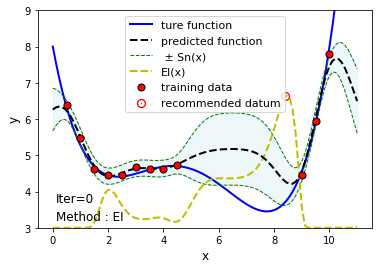

current optimal is : 3.6588
The next datum recomended by Expected Improvement : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.5029332308212076
2 -th sampling, result =  3.5279783076798097
3 -th sampling, result =  3.3263227207982458
4 -th sampling, result =  3.433060444097908
5 -th sampling, result =  3.0232540139919593
evaluated mean of added datum: [3.36270974]
evaluated std of added datum: 0.18356456820101602
---------------------------------------

2-th iteration 
 new added datum: [8.1, array([3.3627])]


<Figure size 432x288 with 0 Axes>

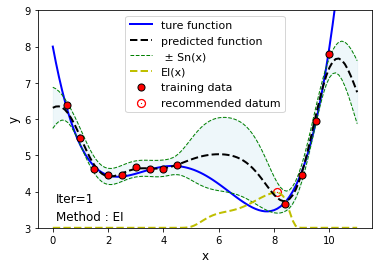

current optimal is : 3.3627
The next datum recomended by Expected Improvement : 
 x =  [7.33333333]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.5182700399548237
2 -th sampling, result =  3.6275106531309462
3 -th sampling, result =  2.9373002291985624
4 -th sampling, result =  3.686968165938649
5 -th sampling, result =  3.223466653221304
evaluated mean of added datum: [3.39870315]
evaluated std of added datum: 0.28048041614485814
---------------------------------------

3-th iteration 
 new added datum: [7.3, array([3.3987])]


<Figure size 432x288 with 0 Axes>

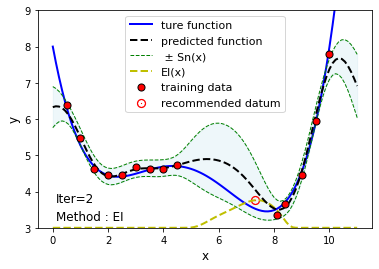

current optimal is : 3.3627
The next datum recomended by Expected Improvement : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  2.8879860156165287
2 -th sampling, result =  4.419311237700306
3 -th sampling, result =  3.395285327721897
4 -th sampling, result =  2.8332552977018137
5 -th sampling, result =  3.0598435190843962
evaluated mean of added datum: [3.31913628]
evaluated std of added datum: 0.5840183610675346
---------------------------------------

4-th iteration 
 new added datum: [7.8, array([3.3191])]


<Figure size 432x288 with 0 Axes>

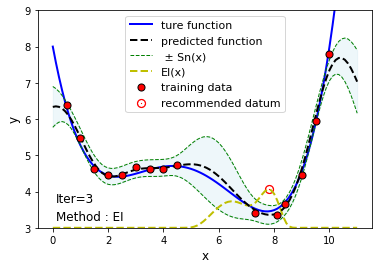

<Figure size 432x288 with 0 Axes>

In [9]:
obs = 5
guessed_noise_std = 0.3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.4467147052169547
2 -th sampling, result =  4.507005875703308
3 -th sampling, result =  3.592665551550156
4 -th sampling, result =  5.158660296359363
5 -th sampling, result =  3.3884160245252173
evaluated mean of added datum: [4.01869249]
evaluated std of added datum: 0.6991255285990432
---------------------------------------

1-th iteration 
 new added datum: [8.4, array([4.0187])]


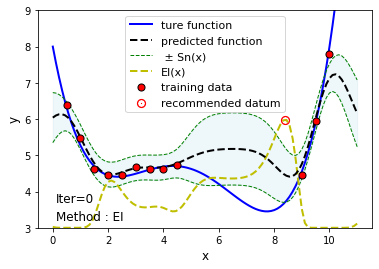

current optimal is : 4.0187
The next datum recomended by Expected Improvement : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.3137883338366887
2 -th sampling, result =  3.3028467881404677
3 -th sampling, result =  3.2289774175142347
4 -th sampling, result =  3.577891104742338
5 -th sampling, result =  3.0936711721066588
evaluated mean of added datum: [3.30343496]
evaluated std of added datum: 0.1581002757917569
---------------------------------------

2-th iteration 
 new added datum: [8.2, array([3.3034])]


<Figure size 432x288 with 0 Axes>

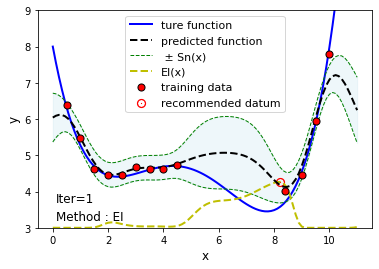

current optimal is : 3.3034
The next datum recomended by Expected Improvement : 
 x =  [7.44444444]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.935811296053706
2 -th sampling, result =  4.032556056985877
3 -th sampling, result =  3.299813036911985
4 -th sampling, result =  3.2235826244540577
5 -th sampling, result =  4.08516291320587
evaluated mean of added datum: [3.71538519]
evaluated std of added datum: 0.3742968259479819
---------------------------------------

3-th iteration 
 new added datum: [7.4, array([3.7154])]


<Figure size 432x288 with 0 Axes>

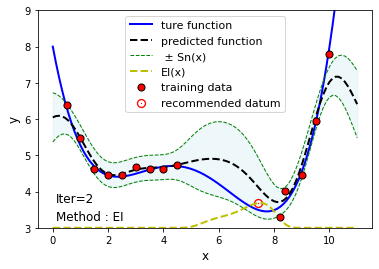

current optimal is : 3.3034
The next datum recomended by Expected Improvement : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.9141610905247886
2 -th sampling, result =  3.4177338471439693
3 -th sampling, result =  3.8546087700905236
4 -th sampling, result =  2.940449753115494
5 -th sampling, result =  3.3871610282358966
evaluated mean of added datum: [3.5028229]
evaluated std of added datum: 0.35491795593129644
---------------------------------------

4-th iteration 
 new added datum: [7.9, array([3.5028])]


<Figure size 432x288 with 0 Axes>

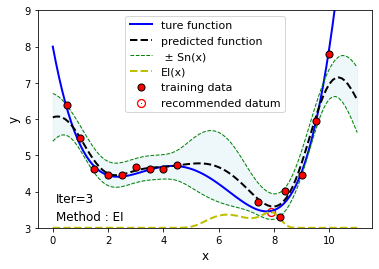

current optimal is : 3.3034
The next datum recomended by Expected Improvement : 
 x =  [6.33333333]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.722111174391246
2 -th sampling, result =  3.66396596217133
3 -th sampling, result =  3.7394271475269436
4 -th sampling, result =  3.982804052298978
5 -th sampling, result =  4.046386814705723
evaluated mean of added datum: [3.83093903]
evaluated std of added datum: 0.15334840403652902
---------------------------------------

5-th iteration 
 new added datum: [6.3, array([3.8309])]


<Figure size 432x288 with 0 Axes>

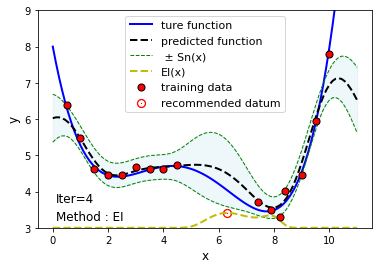

current optimal is : 3.3034
The next datum recomended by Expected Improvement : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.662317533546389
2 -th sampling, result =  3.7857285062029375
3 -th sampling, result =  4.060217608011156
4 -th sampling, result =  2.8837425528956264
5 -th sampling, result =  3.74146675970653
evaluated mean of added datum: [3.62669459]
evaluated std of added datum: 0.3948805814754471
---------------------------------------

6-th iteration 
 new added datum: [7.6, array([3.6267])]


<Figure size 432x288 with 0 Axes>

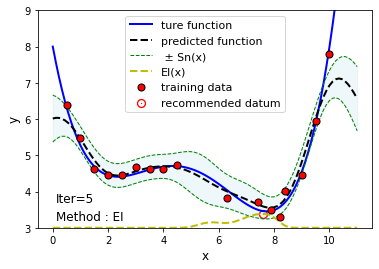

<Figure size 432x288 with 0 Axes>

In [7]:
obs = 5
guessed_noise_std = 0.5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.3626057252763624
2 -th sampling, result =  3.281265582156536
3 -th sampling, result =  2.9356030586292805
4 -th sampling, result =  3.637760543100961
5 -th sampling, result =  3.846984922290744
evaluated mean of added datum: [3.41284397]
evaluated std of added datum: 0.3119812405186396
---------------------------------------

1-th iteration 
 new added datum: [8.3, array([3.4128])]


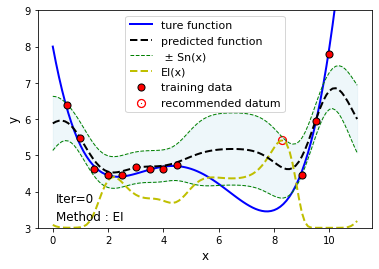

current optimal is : 3.4128
The next datum recomended by Expected Improvement : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.3812545604121147
2 -th sampling, result =  3.6940662267909907
3 -th sampling, result =  3.9090473634678475
4 -th sampling, result =  3.5546868593831236
5 -th sampling, result =  3.419642669538422
evaluated mean of added datum: [3.59173954]
evaluated std of added datum: 0.19310575665122054
---------------------------------------

2-th iteration 
 new added datum: [7.9, array([3.5917])]


<Figure size 432x288 with 0 Axes>

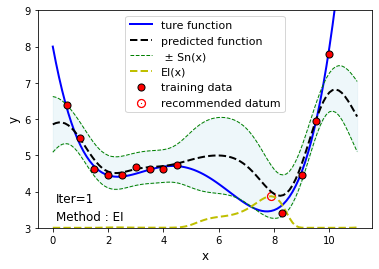

current optimal is : 3.4128
The next datum recomended by Expected Improvement : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.3302279679077955
2 -th sampling, result =  3.7466706005924935
3 -th sampling, result =  3.4191807190255297
4 -th sampling, result =  3.4283811158681696
5 -th sampling, result =  3.447131831690149
evaluated mean of added datum: [3.47431845]
evaluated std of added datum: 0.1420051275279862
---------------------------------------

3-th iteration 
 new added datum: [7.8, array([3.4743])]


<Figure size 432x288 with 0 Axes>

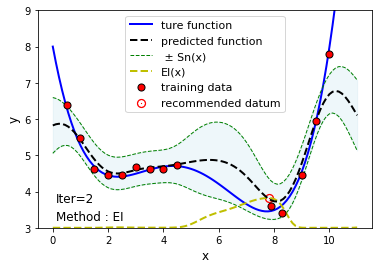

<Figure size 432x288 with 0 Axes>

In [8]:
obs = 5
guessed_noise_std = 0.7

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数
